Top 10 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


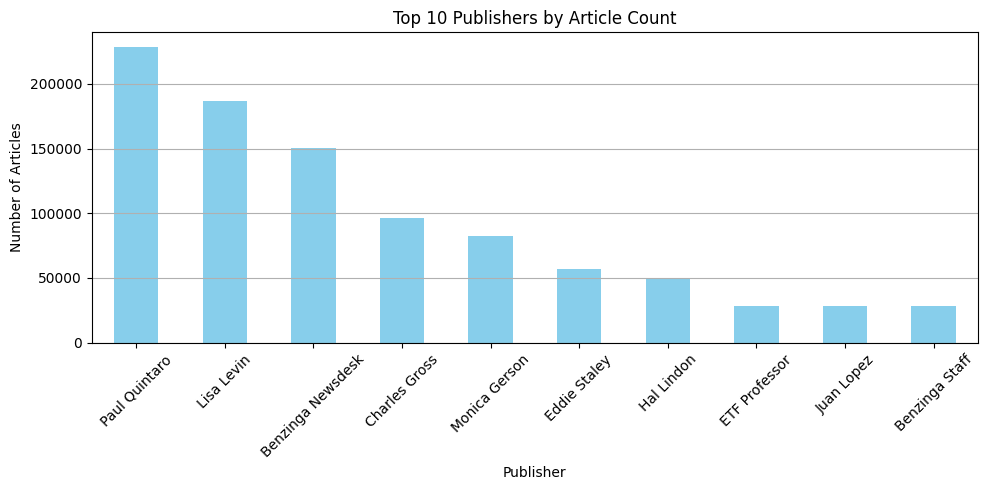


Top 10 publisher email domains:
publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


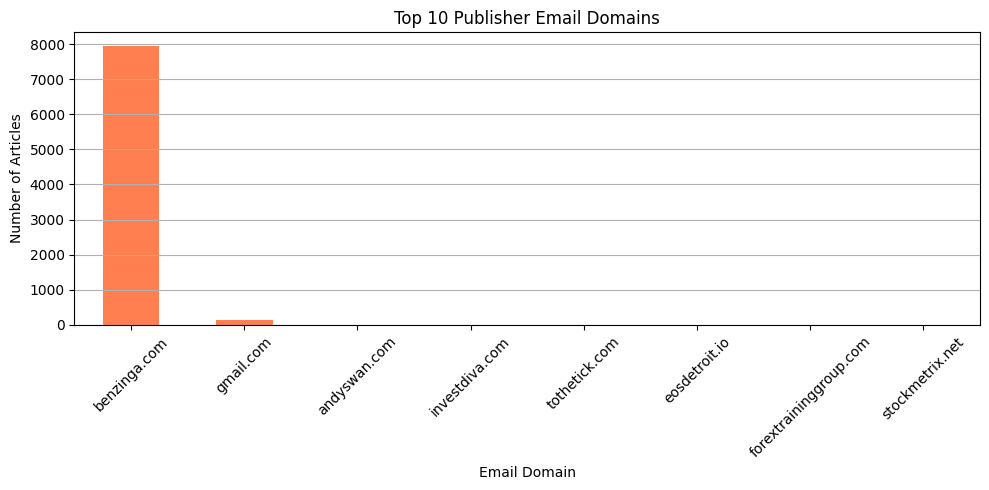

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.pardir))) 
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data (adjust the path as needed)
df = pd.read_csv("../data/raw.csv")

# --- Count articles per publisher ---
publisher_counts = df['publisher'].value_counts()
print("Top 10 publishers by article count:")
print(publisher_counts.head(10))

# Plot top 10 publishers
plt.figure(figsize=(10,5))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Number of Articles")
plt.xlabel("Publisher")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Extract email domains if publishers are emails ---
def extract_domain(publisher):
    if isinstance(publisher, str):
        match = re.search(r'@([\w\.-]+)', publisher)
        if match:
            return match.group(1).lower()
    return None

df['publisher_domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['publisher_domain'].value_counts().dropna()

if not domain_counts.empty:
    print("\nTop 10 publisher email domains:")
    print(domain_counts.head(10))

    # Plot top 10 email domains
    plt.figure(figsize=(10,5))
    domain_counts.head(10).plot(kind='bar', color='coral')
    plt.title("Top 10 Publisher Email Domains")
    plt.ylabel("Number of Articles")
    plt.xlabel("Email Domain")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo email domains found in publisher column.")
